# **Classification of TikTok Videos**

### Step 1: Identify data and compile summary information

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tiktok_dataset.csv")
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [5]:
df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [6]:
claims = df[df['claim_status'] == 'claim']
print("Mean View Count Claim:-",claims['video_view_count'].mean())
print("Median Video Count Claim:-",claims['video_view_count'].median())

Mean View Count Claim:- 501029.4527477102
Median Video Count Claim:- 501555.0


In [7]:
opinion = df[df['claim_status'] == 'opinion']
print("Mean View Count opinion:-",opinion['video_view_count'].mean())
print("Median Video Count opinion:-",opinion['video_view_count'].median())

Mean View Count opinion:- 4956.43224989447
Median Video Count opinion:- 4953.0


#### The mean and median between each category is close to one another, but there is an unexpected difference between the view counts of claimed and opinion video. 

In [8]:
df.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

In [9]:
df.groupby(['author_ban_status']).agg(
             { 'video_view_count':['count','mean','median'],
               'video_like_count':['count','mean','median'],
               'video_share_count':['count','mean','median']
             })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

In [10]:
df['likes_per_view'] = df['video_like_count']/ df['video_view_count']
df['likes_per_view']

0        0.056584
1        0.549096
2        0.108282
3        0.548459
4        0.622910
           ...   
19377         NaN
19378         NaN
19379         NaN
19380         NaN
19381         NaN
Name: likes_per_view, Length: 19382, dtype: float64

In [11]:
df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']
df['comment_per_view']

0        0.000000
1        0.004855
2        0.000365
3        0.001335
4        0.002706
           ...   
19377         NaN
19378         NaN
19379         NaN
19380         NaN
19381         NaN
Name: comment_per_view, Length: 19382, dtype: float64

In [12]:
df['share_per_view'] = df['video_share_count'] / df['video_view_count']
df['share_per_view']

0        0.000702
1        0.135111
2        0.003168
3        0.079569
4        0.073175
           ...   
19377         NaN
19378         NaN
19379         NaN
19380         NaN
19381         NaN
Name: share_per_view, Length: 19382, dtype: float64

In [13]:
df.groupby(['claim_status','author_ban_status']).agg({
           'likes_per_view':['count','mean','median'],
            'comment_per_view':['count','mean','median'],
            'share_per_view':['count','mean','median']
})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comment_per_view                      \
                                          count      mean    median   
claim_status author_ban_status                                        
claim        active                        6566  0.001393  0.000776   
             banned                        1439  0.001377  0.000746   
             under review                  1603  0.001367  0.000789   
opinion      active                        8817  0.000517  0.000252   
             banned                         196  0.000434  0.000193   
             under review                   463  0.000536  0.000293   

                               share_per_view                      
                                        count      mean    median  
claim_status author_ban_status                                     
claim        active                      6566  0.065456  0.049279  
             banned                      1439  0.067893  0.051606  
             under review                1603  0.065733  0.049967  
opinion      active                      8817  0.043729  0.032405  
             banned                       196  0.040531  0.030728  
             under review                 463  0.044472  0.035027

- The 'Like & Share' of 'banned & under review' authors is more as compared to active authors in claim category. This brings more engagement rate and as already rectified that there is more indulgence in claim category as compared to opinion category. 

# Step 2: Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\uttam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
df.size

290730

In [16]:
df.shape

(19382, 15)

Text(0.5, 1.0, 'Video Duration in Seconds')

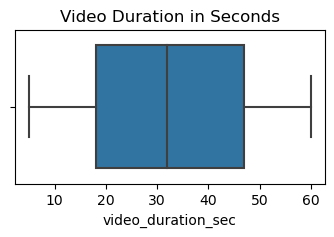

In [17]:
plt.figure(figsize=(4,2))
sns.boxplot(x = df['video_duration_sec'])
plt.title('Video Duration in Seconds')

Text(0.5, 1.0, 'Histogram of Video Duration in Seconds')

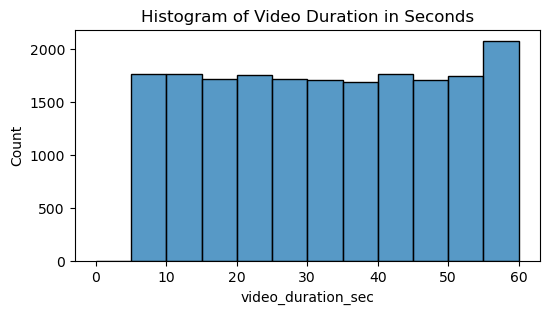

In [18]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_duration_sec'],bins = range(0,61,5))
plt.title('Histogram of Video Duration in Seconds')

- All videos are 5-60 seconds in length and have uniform distribution.

Text(0.5, 1.0, 'Videos View Count')

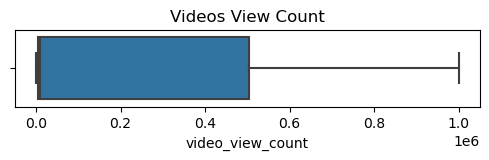

In [19]:
plt.figure(figsize=(6,1))
sns.boxplot(x = df['video_view_count'])
plt.title('Videos View Count')

Text(0.5, 1.0, 'Histogram of Video View Count')

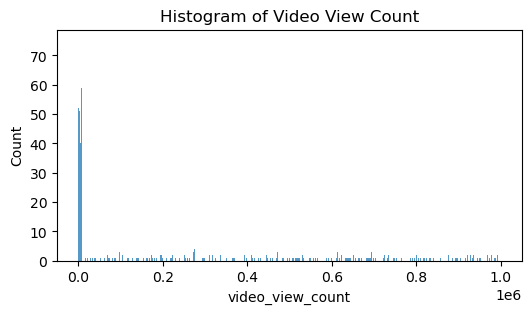

In [20]:
plt.figure(figsize=(6,3))
sns.histplot(df['video_view_count'],bins = range(0,10**6,10*5))
plt.title('Histogram of Video View Count')

Text(0.5, 1.0, 'Videos Like Count')

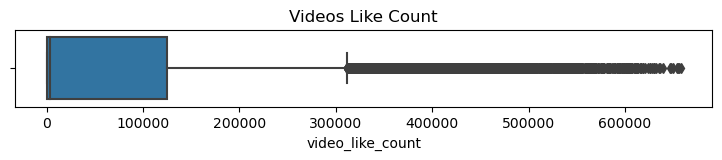

In [21]:
plt.figure(figsize=(9,1))
sns.boxplot(x = df['video_like_count'])
plt.title('Videos Like Count')

Text(0.5, 1.0, 'Histogram of Video Like Count')

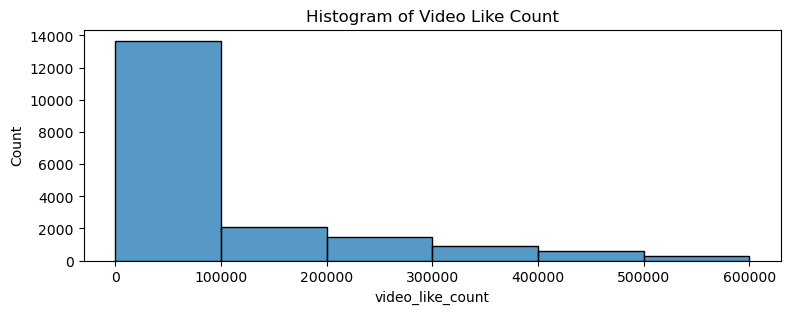

In [22]:
plt.figure(figsize=(9,3))
ax = sns.histplot(df['video_like_count'],bins = range(0,(7*10**5),10**5))
labels = [0] + [str(i) + 'k' for i in range(100,701,100)]
ax.set_xticks(range(0,7*10**5,10**5))
plt.title('Histogram of Video Like Count')

Text(0.5, 1.0, 'Video Comment Count')

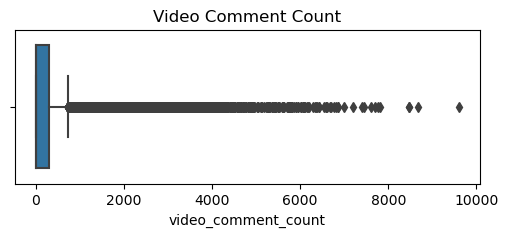

In [23]:
plt.figure(figsize=(6,2))
sns.boxplot(x = df['video_comment_count'])
plt.title('Video Comment Count')

Text(0.5, 1.0, 'Video Comment Count Histogram')

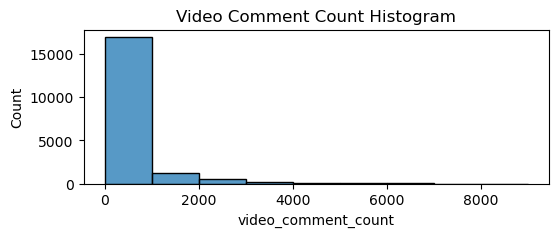

In [24]:
plt.figure(figsize=(6,2))
sns.histplot(df['video_comment_count'],bins = range(0,10000,1000))
plt.title("Video Comment Count Histogram")

Text(0.5, 1.0, 'Video Download Count')

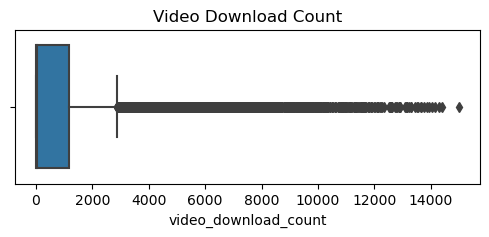

In [25]:
plt.figure(figsize=(6,2))
sns.boxplot(x= df['video_download_count'])
plt.title("Video Download Count")

Text(0.5, 1.0, 'Video Download Count Histogram')

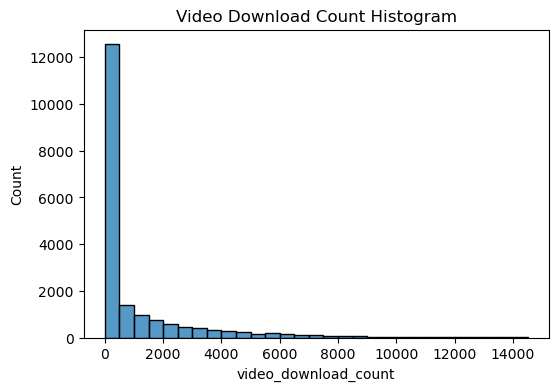

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['video_download_count'], bins = range(0,15000,500))
plt.title("Video Download Count Histogram")

Text(0.5, 1.0, 'Video Share Count ')

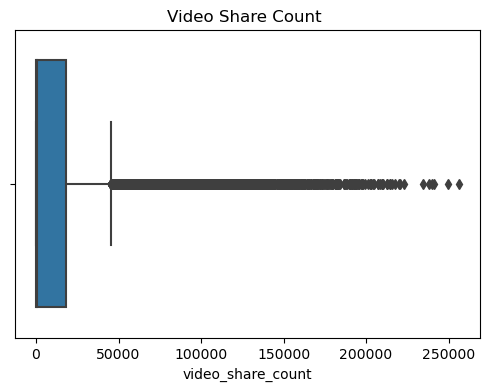

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df['video_share_count'])
plt.title("Video Share Count ")

Text(0.5, 1.0, 'Video Share Count Histogram')

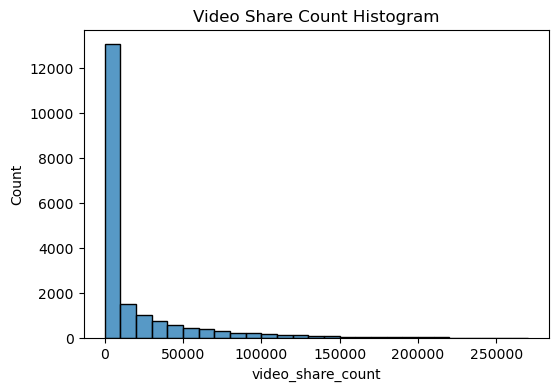

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(df['video_share_count'], bins = range(0,270001,10000))
plt.title("Video Share Count Histogram")

 Majority video have less than 10,000 shares. The histogram shows right skewed distribution. 

Text(0.5, 1.0, 'Claim Status by Verification Status')

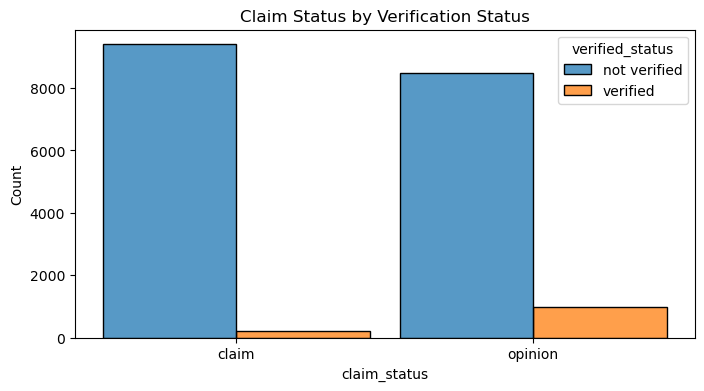

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, 
            x = 'claim_status',
            hue= 'verified_status',
            multiple = 'dodge',
            shrink = 0.9)
plt.title("Claim Status by Verification Status")

There are very few verified users as compared to unverified users, and if verified they are likely to post opinion videos.

Text(0.5, 1.0, 'Claim Status by Author Ban Status')

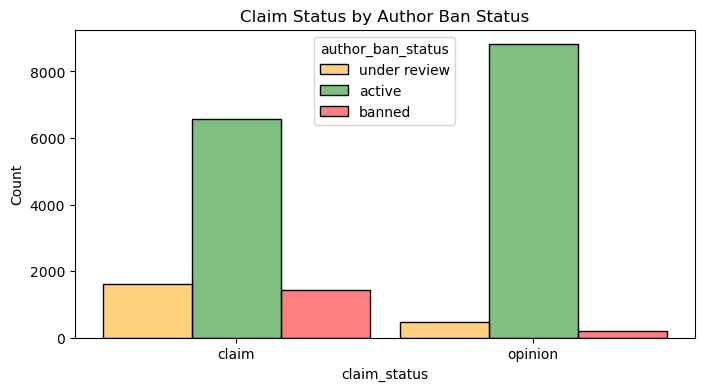

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x = 'claim_status',
             multiple = 'dodge',
             hue = 'author_ban_status',
             hue_order={'active','under review','banned'},
             palette = {'active':'green', 'under review':'orange', 'banned':'red'},
             shrink = 0.9,
             alpha = 0.5 )
plt.title("Claim Status by Author Ban Status")

Text(0.5, 1.0, 'Median View Counts by Ban Status')

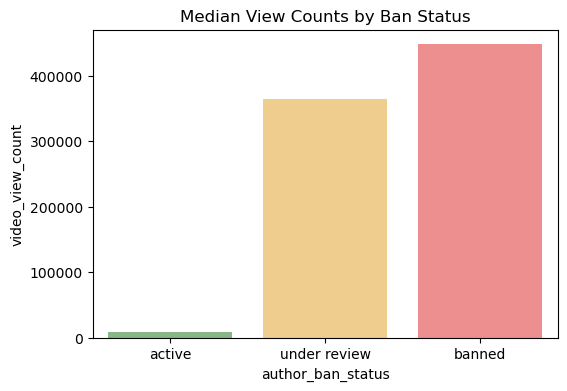

In [31]:
ban_status_count = df.groupby(['author_ban_status']).median(numeric_only = True).reset_index()
figure = plt.figure(figsize=(6,4))
sns.barplot( data = ban_status_count, 
            x= 'author_ban_status', y ='video_view_count',
            order= ['active','under review','banned'],
            palette ={'active':'green','under review':'orange','banned':'red'},
            alpha = 0.5        )
plt.title("Median View Counts by Ban Status")

Median View Count of non-active users is far more than active users. Since non-active users are far more likely to post claims, and authors of such videos are far more likely 
to get more aggregate views than active users.

In [32]:
df.groupby('claim_status').median(numeric_only = True)['video_view_count']

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

Text(0.5, 1.0, 'Total views by video claim status')

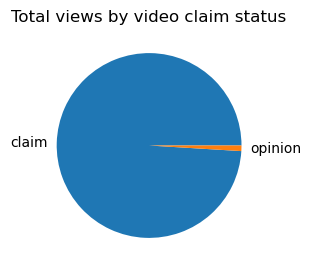

In [33]:
fig = plt.figure(figsize=(5,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(),labels = ['claim','opinion'])
plt.title("Total views by video claim status")

The overall view count is bent towards the claim side compared to the opinion side, although each video status type has the same video counts.

In [34]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'likes_per_view',
       'comment_per_view', 'share_per_view'],
      dtype='object')

In [35]:
count_cols = ['video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count']
for col in count_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    median = df[col].median()
    outlier_threshold = median + 1.5 * iqr

    outlier_count = (df[col] > outlier_threshold).sum()
    print(f'Number of outliers,{col}:',outlier_count)

Number of outliers,video_view_count: 2343
Number of outliers,video_like_count: 3468
Number of outliers,video_share_count: 3732
Number of outliers,video_download_count: 3733
Number of outliers,video_comment_count: 3882


<Axes: xlabel='video_like_count', ylabel='video_comment_count'>

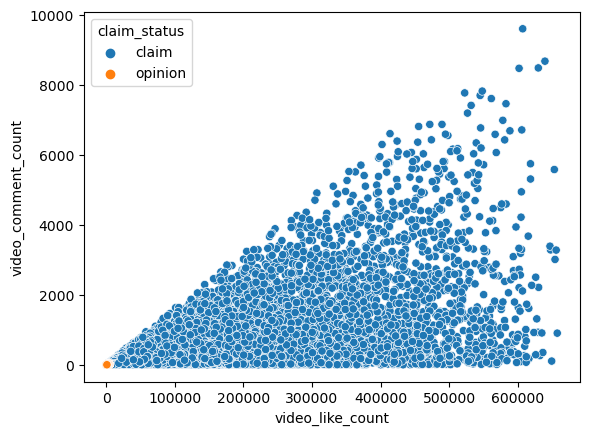

In [36]:
sns.scatterplot(x = df['video_like_count'], y = df['video_comment_count'], hue = df['claim_status'] )

<Axes: xlabel='video_like_count', ylabel='video_comment_count'>

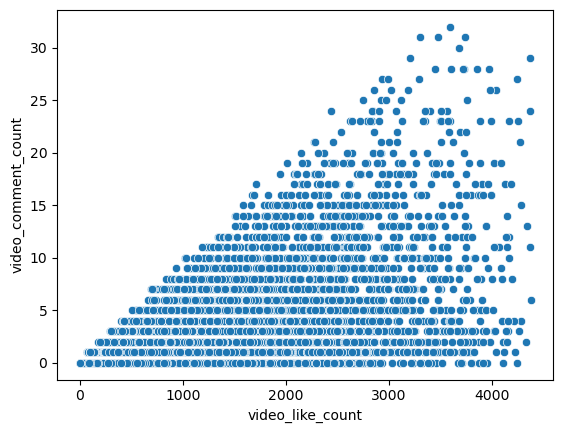

In [37]:
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x = opinion['video_like_count'], y = opinion['video_comment_count'] )

## Step 3 : Statistical Analysis

Some Questions that need to be answered are:- 
1) Do videos from verified accounts and videos unverified accounts have different average view counts?
2) Is there a relationship between the account being verified and the associated videos' view counts?

In [38]:
from scipy import stats

In [39]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [40]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,0.276093,0.000954,0.054860
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,0.173006,0.001326,0.050597
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,0.130240,0.000098,0.014445
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,0.264037,0.000455,0.039739
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,0.398482,0.001268,0.081864
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,0.666648,0.010280,0.265956


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  likes_per_view            19084 non-null  float64
 13  comment_per_view          19084 non-null  float64
 14  share_

In [42]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
likes_per_view              298
comment_per_view            298
share_per_view              298
dtype: int64

In [43]:
df1 = df.dropna(axis = 0)

In [44]:
df1.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [45]:
df1['verified_status'].value_counts()

not verified    17884
verified         1200
Name: verified_status, dtype: int64

In [46]:
df1.groupby('verified_status').mean()[['video_view_count']]

,video_view_count
verified_status,
not verified,265663.785339
verified,91439.164167


Hypothesis: \
Null Hypothesis: - There is no difference in the number of views count between the videos posted by verified users and non-verified users on TikTok videos. \
Alternate Hypothesis: - There is a difference in the number of views count between the videos posted by verified users and non-verified users on TikTok videos.
- __*5* % significance level is selected in two-sample t-test.__

In [47]:
not_verified = df1[df1['verified_status'] == 'not verified']['video_view_count']
verified = df1[df1['verified_status'] == 'verified']['video_view_count']

stats.ttest_ind(a = not_verified, b = verified, equal_var=False)

Ttest_indResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120)

- Since the pvalue is very small, we reject the null hypothesis. Further we can conclude that there is a statistically significant difference in the mean video view count between verified and non-verified accounts on TikTok.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

The next step will be to build a regression model on verified_status. A regression model is the natural next step because the end goal is to make predictions on claim status. A regression model for verified_status can help analyze user behavior in this group of verified users.

- **Technical note to prepare regression model:** Because the data is skewed, and there is a significant difference in account types, it will be key to build a logistic regression model.

## Step 5: Regression Modeling

- IF a user is a verified user, they are much more likely to post opinions.Now question comes how to predict a verified status of the author so to characterize the video of verified user.

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 0 to 19083
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  likes_per_view            19084 non-null  float64
 13  comment_per_view          19084 non-null  float64
 14  share_

In [51]:
df1.duplicated().sum()

0

In [52]:
df1['verified_status'].value_counts(normalize = True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

- **93.7 % of dataset represent videos posted by not verified accounts** and **6.2 % videos are posted by verified accounts**.This shows class imbalance so we need to resample the data. 

In [53]:
data_majority = df1[df1['verified_status'] == 'not verified']
#print(data_majority)
data_minority = df1[df1['verified_status'] == 'verified']
#print(data_minority)

In [54]:
data_minority_upsampled = resample(data_minority,
                                   replace = True,
                                   n_samples= len(data_majority),
                                   random_state = 0 )

In [55]:
data_upsampled = pd.concat([data_majority,data_minority_upsampled]).reset_index(drop=True)
data_upsampled['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

In [56]:
data_upsampled[['verified_status','video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(func=lambda array:np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [57]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func = lambda text : len(text))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


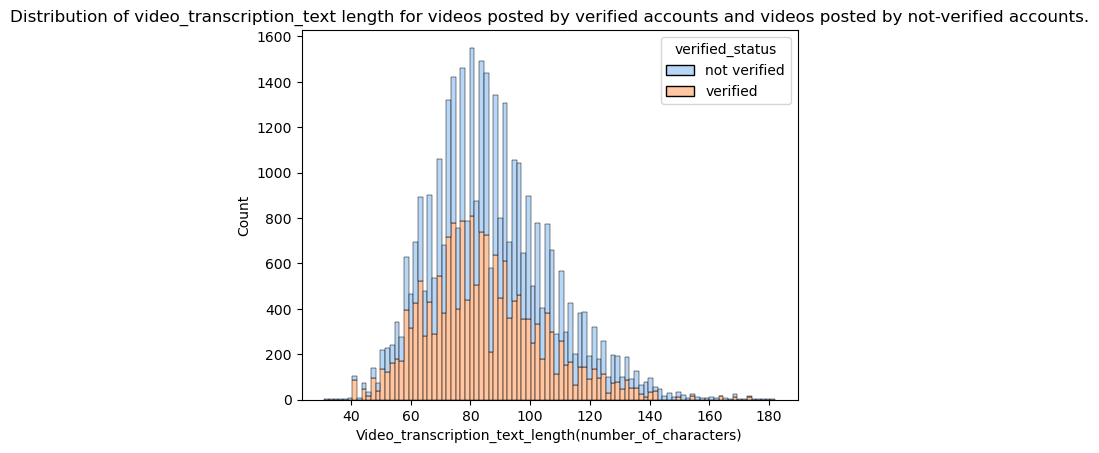

In [58]:
sns.histplot(data = data_upsampled,stat='count',multiple='stack',x = 'text_length', kde = False, palette='pastel',hue= 'verified_status',element = 'bars', legend=True)
plt.xlabel('Video_transcription_text_length(number_of_characters)')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by not-verified accounts.')
plt.show()

In [59]:
data_upsampled.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.571864,0.437756,0.404701,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.409255,0.748841,0.307483,0.149750
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.571864,0.485643,0.476817,0.409255,1.000000,0.539845,0.675187,0.094428
comment_per_view,-0.311144,0.005954,-0.021063,0.292290,0.437756,0.389892,0.600509,0.748841,0.539845,1.000000,0.394044,0.114497


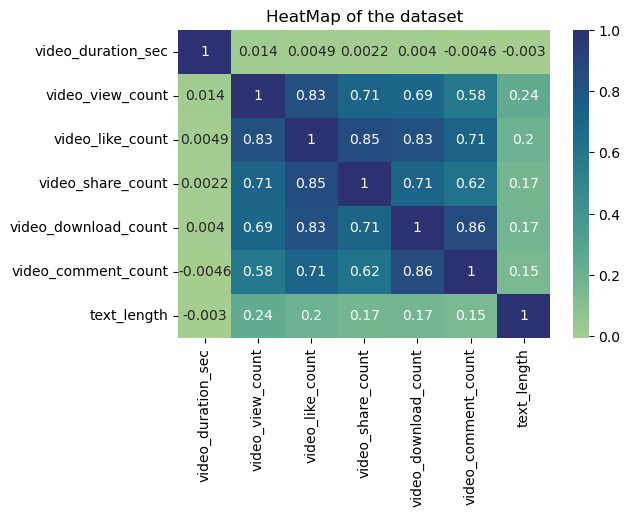

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(data_upsampled[['video_duration_sec','claim_status','author_ban_status','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count','text_length' ]].corr(),annot=True, cmap = 'crest')
plt.title("HeatMap of the dataset")
plt.show()

In [61]:
# To avoid multicollinearity, we have removed 'video_like_count' is removed.

In [62]:
X = data_upsampled[['video_duration_sec','claim_status','author_ban_status','video_view_count','video_share_count','video_download_count','video_comment_count']]
y = data_upsampled['verified_status']

In [63]:
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [65]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [66]:
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [67]:
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [68]:
X_train_to_encode = X_train[['claim_status','author_ban_status']]
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [69]:
X_encoder = OneHotEncoder(drop = 'first', sparse = False)

In [70]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

C:\Users\uttam\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [72]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [73]:
X_train_encoded_df = pd.DataFrame(data = X_train_encoded, columns = X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [74]:
X_train.drop(columns = ['claim_status','author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [75]:
X_train_final = pd.concat([X_train.drop(columns = ['claim_status','author_ban_status']).reset_index(drop=True),X_train_encoded_df],axis = 1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [76]:
y_train.dtype

dtype('O')

In [77]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [78]:
y_encoder = OneHotEncoder(drop='first',sparse = False)

In [79]:
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

C:\Users\uttam\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

In [81]:
log_clf = LogisticRegression(random_state=0,max_iter = 500).fit(X_train_final,y_train_final)

In [82]:
X_test_to_encode = X_test[['claim_status','author_ban_status']]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [83]:
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [84]:
X_test_encoded_df = pd.DataFrame(data = X_test_encoded, columns = X_encoder.get_feature_names_out())
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [85]:
X_test_final = pd.concat([X_test.drop(columns = ['claim_status','author_ban_status']).reset_index(drop = True), X_test_encoded_df], axis = 1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [86]:
X_test_final = pd.concat([X_test.drop(columns=['claim_status','author_ban_status']).reset_index(drop= True), X_test_encoded_df], axis = 1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [87]:
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [88]:
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

In [89]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [90]:
X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape 

((26826, 8), (8942, 8), (26826,), (8942,))

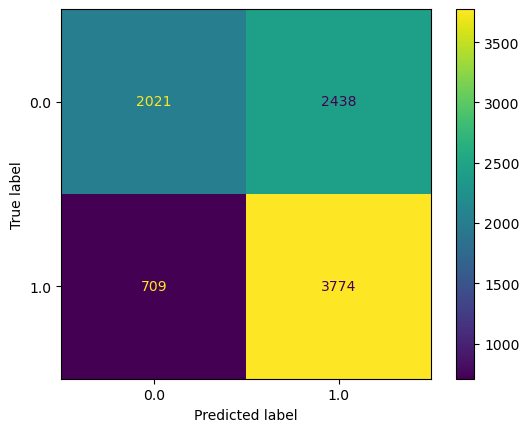

In [91]:
log_cm = confusion_matrix(y_test_final, y_pred,labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_disp.plot()
plt.show()

In [92]:
target_labels = ['verified','not_verified']
print(classification_report(y_test_final,y_pred,target_names = target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not_verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



The Classification report shows that the logistic regression model achieved a precision of 67% and recall of 65%, and it achieved an accuracy of 66%.

In [93]:
pd.DataFrame(data ={'Feature Name':log_clf.feature_names_in_,'Model Coefficient':log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.493546e-03
1,video_view_count,-2.277453e-06
2,video_share_count,5.458611e-06
3,video_download_count,-2.143023e-04
4,video_comment_count,3.899371e-04
5,claim_status_opinion,3.772015e-04
6,author_ban_status_banned,-1.675961e-05
7,author_ban_status_under review,-7.084767e-07


## Step 6: Classify Videos Using Machine Learning

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [95]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV

In [96]:
df1['claim_status'].value_counts(normalize = True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

The dataset shows 50.3 % of videos represent claims and 49.6 % of videos represent opinions, this shows that the outcome variable is balanced. 

In [97]:
df1.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [98]:
df1['text_length'] = df1['video_transcription_text'].str.len()
df1['text_length']

C:\Users\uttam\AppData\Local\Temp\ipykernel_20048\3918695357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_length'] = df1['video_transcription_text'].str.len()


0         97
1        107
2        137
3        131
4        128
        ... 
19079     65
19080     66
19081     53
19082     80
19083     70
Name: text_length, Length: 19084, dtype: int64

In [99]:
df1[['claim_status','text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


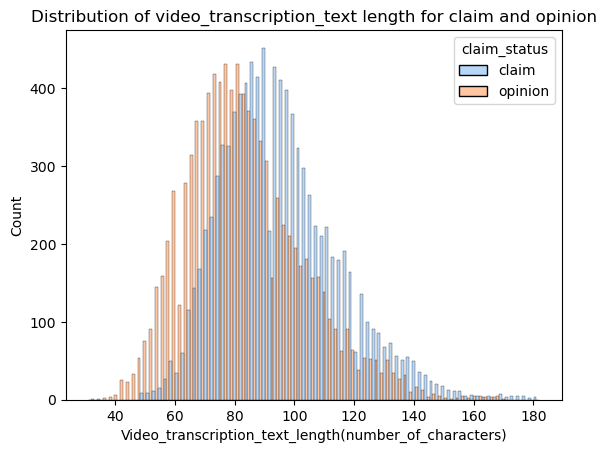

In [100]:
sns.histplot(data = df1,stat='count',multiple='dodge',x = 'text_length', kde = False, palette='pastel',hue= 'claim_status',element = 'bars', legend=True)
plt.xlabel('Video_transcription_text_length(number_of_characters)')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for claim and opinion')
plt.show()

In [101]:
X = df1.copy()
X = X.drop(['#','video_id'],axis =1)
X['claim_status'] = X['claim_status'].replace({'opinion':0,'claim':1})
X = pd.get_dummies(X,
                  columns=['verified_status','author_ban_status'],
                  drop_first = True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128,0,0,0


In [102]:
y = X['claim_status']
X = X.drop(['claim_status'],axis=1)
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128,0,0,0


In [103]:
X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0) 

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((11450, 14), (3817, 14), (11450,), (3817,), (3817, 14), (3817,))

In [106]:
count_vec = CountVectorizer(ngram_range= (2,3),
                             max_features=15,
                             stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [107]:
X_train.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
14829,51,my family's opinion is that the total number o...,2487.0,310.0,20.0,1.0,0.0,0.124648,0.000000,0.008042,134,0,0,0
7396,43,a friend read a study mentioning that bubble w...,118512.0,3543.0,374.0,70.0,29.0,0.029896,0.000245,0.003156,97,0,1,0
2287,22,a friend read online that the longest recorde...,105902.0,1885.0,229.0,39.0,9.0,0.017799,0.000085,0.002162,76,0,0,1
18712,17,my family is convinced that it snows in the s...,9245.0,1670.0,440.0,13.0,4.0,0.180638,0.000433,0.047593,58,0,0,0
9931,18,i feel that halley’s comet won’t be seen again...,3791.0,660.0,63.0,9.0,1.0,0.174097,0.000264,0.016618,57,0,0,0


In [108]:
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
count_df = pd.DataFrame(data=count_data,columns=count_vec.get_feature_names_out())
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True),count_df], axis =1)
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,0.124648,0.000000,0.008042,134,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,0.029896,0.000245,0.003156,97,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,0.017799,0.000085,0.002162,76,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,0.180638,0.000433,0.047593,58,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,0.174097,0.000264,0.016618,57,...,0,0,0,0,0,0,0,0,0,0


In [111]:
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
validation_count_df = pd.DataFrame(data = validation_count_data, columns = count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [113]:
X_val_final = pd.concat([X_val.drop(columns = ['video_transcription_text']).reset_index(drop=True), validation_count_df],axis=1)
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,0.655730,0.000076,0.025241,72,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,0.273221,0.000160,0.049720,96,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,0.608530,0.003051,0.063932,88,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,0.063862,0.000609,0.003023,83,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,0.142063,0.000995,0.026034,104,...,0,0,0,0,0,0,0,1,0,0


In [114]:
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

test_count_df = pd.DataFrame(data = test_count_data, columns=count_vec.get_feature_names_out())

X_test_final = pd.concat([X_test.drop(columns= ['video_transcription_text']).reset_index(drop=True),test_count_df],axis =1 )
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,0.196444,0.000451,0.023973,107,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,0.359799,0.000194,0.006971,69,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,0.429157,0.003669,0.071835,90,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,0.359932,0.000778,0.131747,76,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,0.192276,0.000164,0.027615,72,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [116]:
rf_cv.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [117]:
rf_cv.best_score_

0.9958582006702817

In [118]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [120]:
xgb_cv.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [121]:
xgb_cv.best_score_

0.9913708291794634

In [122]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

In [123]:
rf_y_pred = rf_cv.best_estimator_.predict(X_val_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [124]:
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

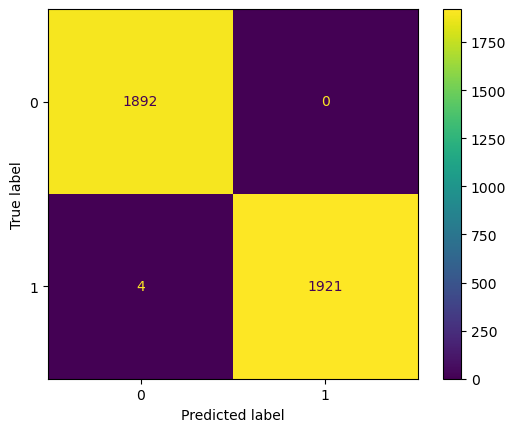

In [125]:
rf_log_cm = confusion_matrix(y_val, rf_y_pred)
rf_log_disp = ConfusionMatrixDisplay(confusion_matrix = rf_log_cm, display_labels = None)
rf_log_disp.plot()
plt.show()

In [126]:
target_labels = ['opinion','claim']
print(classification_report(y_val,rf_y_pred,target_names = target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [127]:
xgb_y_pred = xgb_cv.best_estimator_.predict(X_val_final)
xgb_y_pred

array([1, 0, 1, ..., 1, 1, 1])

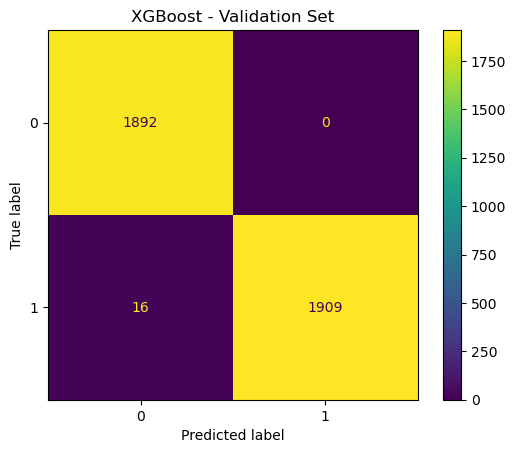

In [128]:
xgb_log_cm = confusion_matrix(y_val,xgb_y_pred)
xgb_log_disp = ConfusionMatrixDisplay(confusion_matrix = xgb_log_cm, display_labels = None)
xgb_log_disp.plot()
plt.title('XGBoost - Validation Set');
plt.show()

In [129]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, xgb_y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



# Best model is Random forest so it is used to make prediction.

In [130]:
y_pred = rf_cv.best_estimator_.predict(X_test_final)

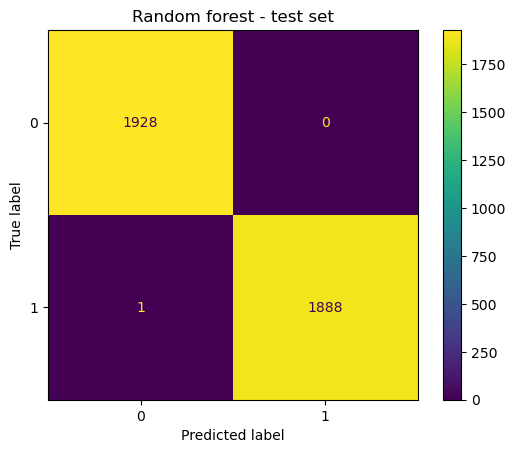

In [131]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

### Feature Importance of Random Forest Model

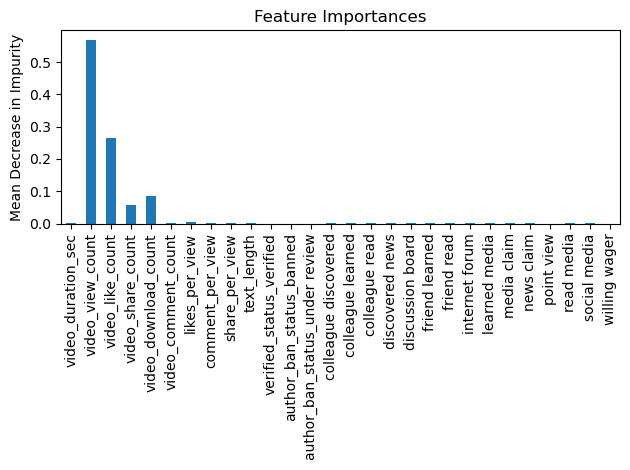

In [132]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances,index = X_test_final.columns)

fig,ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances')
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

**Conclusion:-** The most predictive features were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion. The model currently performs almost perfectly, so no need to engineer any new features. It performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model successfully classified claims and opinions. The current version of the model does not need any new features. However, having the number of times the video was reported would be helpful. It would also be useful to have the total number of user reports for all videos posted by each author.